In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import sys
import pickle
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

sys.path.insert(1, '/kaggle/input/enron-poi-dataset/')
from feature_format import featureFormat,targetFeatureSplit
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finalprojectdatasetconverted/final_project_dataset_converted.pkl
/kaggle/input/enron-poi-dataset/tester.py
/kaggle/input/enron-poi-dataset/feature_format.py
/kaggle/input/enron-poi-dataset/final_project_dataset.pkl
/kaggle/input/enron-email-dataset/emails.csv


In [8]:
with open('/kaggle/input/finalprojectdatasetconverted/final_project_dataset_converted.pkl', 'rb') as f:
    data_dict = pickle.load(f)

In [ ]:
#data_dict

# Visualising the Data

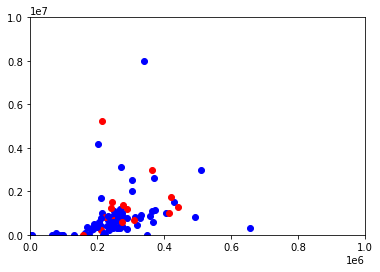

In [9]:
features=["poi", "salary", "bonus"]
return_list=featureFormat(data_dict,features)

x=return_list[:,0]
y=return_list[:,1]
z=return_list[:,2]

fig,ax = plt.subplots(1,1)
ax.set(ylim=(0,10000000))
ax.set(xlim=(0,1000000))
for i in range(len(x)):
    if(x[i]==0):
        ax.scatter(y[i],z[i],color='b')
    else:
        ax.scatter(y[i],z[i],color='r')


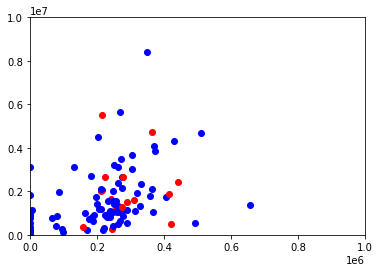

In [10]:
features=["poi", "salary", "total_payments"]
return_list=featureFormat(data_dict,features)

x=return_list[:,0]
y=return_list[:,1]
z=return_list[:,2]

fig,ax = plt.subplots(1,1)
ax.set(ylim=(0,10000000))
ax.set(xlim=(0,1000000))
for i in range(len(x)):
    if(x[i]==0):
        ax.scatter(y[i],z[i],color='b')
    else:
        ax.scatter(y[i],z[i],color='r')


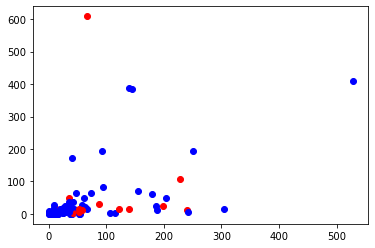

In [11]:
features=["poi","from_poi_to_this_person", "from_this_person_to_poi"]
return_list=featureFormat(data_dict,features)

x=return_list[:,0]
y=return_list[:,1]
z=return_list[:,2]

fig,ax = plt.subplots(1,1)

for i in range(len(x)):
    if(x[i]==0):
        ax.scatter(y[i],z[i],color='b')
    else:
        ax.scatter(y[i],z[i],color='r')


# Creating New Features

In [13]:
def computeFraction( poi_messages, all_messages ):
    if(poi_messages=='NaN' or all_messages=='NaN'):
        fraction = 0.
    else :
        fraction = poi_messages/all_messages
    return fraction

submit_dict = {}
for name in data_dict:

    data_point = data_dict[name]

    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = computeFraction( from_poi_to_this_person, to_messages )
    # print (fraction_from_poi)
    data_point["fraction_from_poi"] = fraction_from_poi


    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = computeFraction( from_this_person_to_poi, from_messages )
    # print (fraction_to_poi)
    data_point["fraction_to_poi"] = fraction_to_poi
    
    
    #shared_poi_ratio
    shared_receipt_with_poi = data_point["shared_receipt_with_poi"]
    to_messages = data_point["to_messages"]
    shared_poi_ratio = computeFraction(shared_receipt_with_poi , to_messages )
    data_point["shared_poi_ratio"]=shared_poi_ratio
    
    
    #bonus_to_salary
    bonus = data_point["bonus"]
    salary = data_point["salary"]
    bonus_to_salary = computeFraction(bonus , salary)
    data_point["bonus_to_salary"]= bonus_to_salary
    
    
    #bonus_to_payment
    bonus = data_point["bonus"]
    payment = data_point["total_payments"]
    bonus_to_payment = computeFraction(bonus , payment)
    data_point["bonus_to_payment"]= bonus_to_payment
    
    
    submit_dict[name]={"from_poi_to_this_person":fraction_from_poi,
                       "from_this_person_to_poi":fraction_to_poi,
                      "shared_poi_ratio":shared_poi_ratio,
                      "bonus_to_salary":bonus_to_salary,
                      "bonus_to_payment":bonus_to_payment}

In [ ]:
#data_dict

In [14]:
features_list=["poi","from_poi_to_this_person", "from_this_person_to_poi","shared_poi_ratio","bonus_to_salary","bonus_to_payment"]
return_list=featureFormat(data_dict,features_list)


In [15]:
target,features = targetFeatureSplit(return_list)
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, train_size=0.8,test_size=0.2, random_state=42)

# Using Different Algorithms to fit the data

In [18]:
reg = LogisticRegression().fit(X_train, y_train)
y_pred=reg.predict(X_test)
print ("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.7272727272727273


In [20]:
clf = make_pipeline(StandardScaler(), SVC(gamma='scale'))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print ("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.7727272727272727


# Using Decision Tree Classifier to predict poi

In [21]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=5, min_samples_leaf=4)
clf_gini.fit(X_train, y_train) 
y_pred=clf_gini.predict(X_test)
print ("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.8636363636363636


# Output files

In [ ]:
pickle.dump(data_dict, open("mydataset.pkl","wb"))
pickle.dump(clf_gini, open("myclassifier.pkl", "wb"))
pickle.dump(features_list , open( "myfeaturelist.pkl", "wb"))